In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
single_image= X_train[0]

In [5]:
single_image.shape

(28, 28)

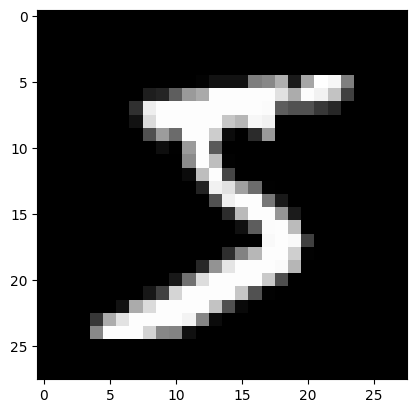

In [6]:
plt.imshow(single_image,cmap='gray')

In [7]:
y_train.shape

(60000,)

In [8]:
X_train.min()


0

In [9]:
X_train.max()

255

In [10]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [11]:
X_train_scaled.min()

0.0

In [12]:
X_train_scaled.max()

1.0

In [13]:
y_train[0]

5

In [14]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [20]:
type(y_train_onehot)

numpy.ndarray

In [21]:
y_train_onehot.shape

(60000, 10)

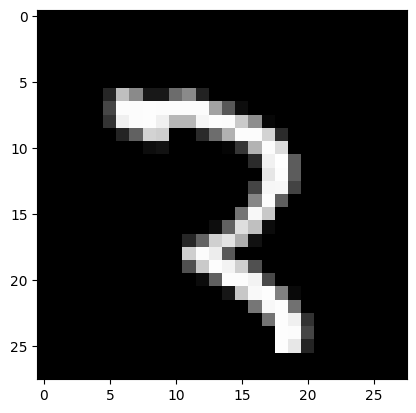

In [22]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [23]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [25]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [26]:
model = keras.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape = (28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(10,activation = 'softmax'))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [28]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [29]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 55s 57ms/step - loss: 0.1865 - accuracy: 0.9431 - val_loss: 0.0520 - val_accuracy: 0.9826
Epoch 2/5
938/938 [==============================] - 52s 56ms/step - loss: 0.0496 - accuracy: 0.9848 - val_loss: 0.0419 - val_accuracy: 0.9868
Epoch 3/5
938/938 [==============================] - 52s 56ms/step - loss: 0.0354 - accuracy: 0.9883 - val_loss: 0.0334 - val_accuracy: 0.9889
Epoch 4/5
938/938 [==============================] - 53s 57ms/step - loss: 0.0281 - accuracy: 0.9911 - val_loss: 0.0439 - val_accuracy: 0.9855
Epoch 5/5
938/938 [==============================] - 51s 54ms/step - loss: 0.0223 - accuracy: 0.9929 - val_loss: 0.0330 - val_accuracy: 0.9894


In [30]:
metrics = pd.DataFrame(model.history.history)

In [31]:
print("AMURTHA VAAHINI.KN")
print("212222240008")
metrics.head()

AMURTHA VAAHINI.KN
212222240008


,loss,accuracy,val_loss,val_accuracy
0,0.186492,0.943117,0.052029,0.9826
1,0.049627,0.984850,0.041869,0.9868
2,0.035362,0.988300,0.033413,0.9889
3,0.028141,0.991133,0.043851,0.9855
4,0.022288,0.992883,0.032957,0.9894


AMURTHA VAAHINI.KN
212222240008


<Axes: >

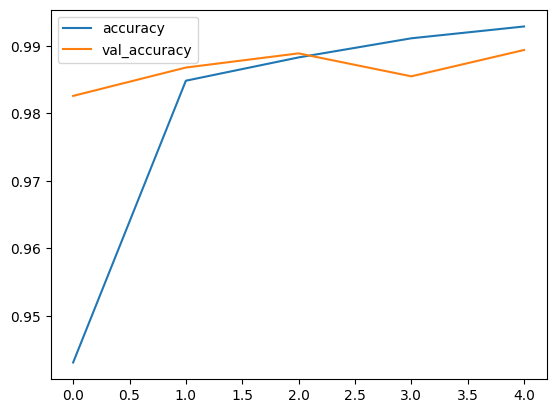

In [32]:
print("AMURTHA VAAHINI.KN")
print("212222240008")
metrics[['accuracy','val_accuracy']].plot()

AMURTHA VAAHINI.KN
212222240008


<Axes: >

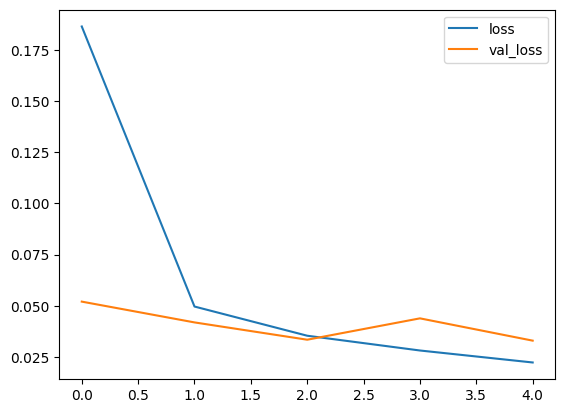

In [33]:
print("AMURTHA VAAHINI.KN")
print("212222240008")
metrics[['loss','val_loss']].plot()

In [34]:
print("AMURTHA VAAHINI.KN")
print("212222240008")
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

AMURTHA VAAHINI.KN
212222240008
313/313 [==============================] - 3s 9ms/step


In [35]:
print("AMURTHA VAAHINI.KN")
print("212222240008")
print(confusion_matrix(y_test,x_test_predictions))

AMURTHA VAAHINI.KN
212222240008
[[ 975    0    1    0    0    0    1    2    1    0]
 [   0 1133    0    0    0    0    1    1    0    0]
 [   0    1 1026    0    0    0    1    4    0    0]
 [   0    1    3 1001    0    4    0    1    0    0]
 [   0    0    0    0  960    0    2    0    3   17]
 [   1    0    0    5    0  881    3    1    1    0]
 [   2    2    0    0    1    1  951    0    1    0]
 [   0    2   14    0    0    1    0 1008    1    2]
 [   1    0    3    2    0    0    0    1  966    1]
 [   0    1    0    1    1    5    1    4    3  993]]


In [36]:
print("AMURTHA VAAHINI.KN")
print("212222240008")
print(classification_report(y_test,x_test_predictions))


AMURTHA VAAHINI.KN
212222240008
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [38]:
img = image.load_img('/content/DL3.png')


In [39]:
type(img)

PIL.Image.Image

In [40]:
img = image.load_img('/content/DL3.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [41]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 28ms/step


In [42]:
print(x_single_prediction)

[9]


AMURTHA VAAHINI.KN
212222240008


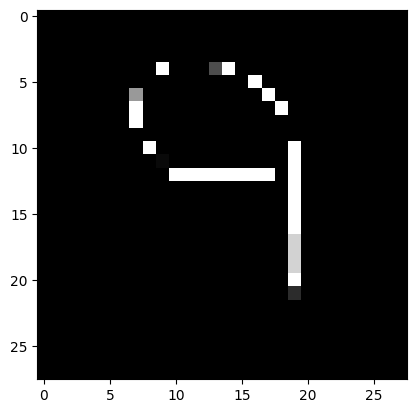

In [43]:
print("AMURTHA VAAHINI.KN")
print("212222240008")
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [44]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [45]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 37ms/step


In [53]:
print("AMURTHA VAAHINI.KN")
print("212222240008")
print(x_single_prediction)

AMURTHA VAAHINI.KN
212222240008
[9]
